In [23]:
#Set the working directory
setwd("C:/Users/James Twose/Google Drive/Neurokeys/Vocal analysis add on")
#setwd("/home/james/Data_Science")
library(casnet)

mjfdf <- read.table("monojformant.txt", header = TRUE)
djfdf <- read.table("dynamojformant.txt", header = TRUE)

In [24]:
#subset formant of interest
mjfdfs <- mjfdf[1:1150, c(1, 3)]
djfdfs <- djfdf[1:1150, c(1, 3)]

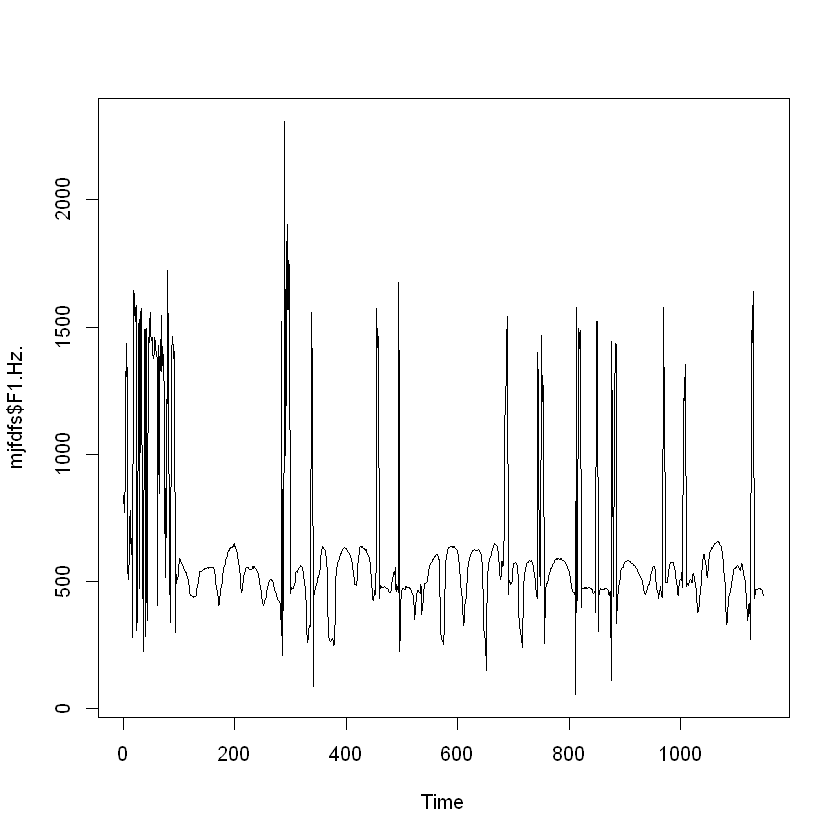

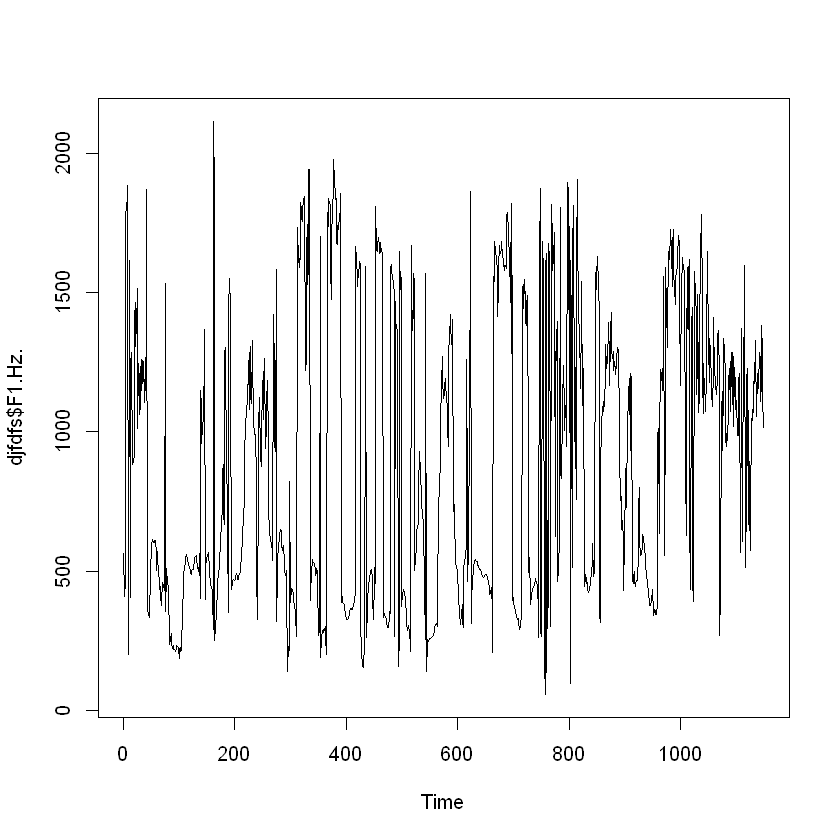

In [26]:
#plot the time series
plot.ts(mjfdfs$F1.Hz.)
plot.ts(djfdfs$F1.Hz.)

In [27]:
#scale the time series using elascer
mjfdfse <- mjfdfs
djfdfse <- djfdfs
names(mjfdfse) = c("time", "f1")
names(djfdfse) = c("time","f1")
mjfdfse$f1e <- elascer(mjfdfse$f1)
djfdfse$f1e <- elascer(djfdfse$f1)
mjfdfse <- mjfdfse[, c(1, 3)]
djfdfse <- djfdfse[, c(1, 3)]

In [28]:
#determine delay (emlag) and embedding dimension (emdim) - monotone voice
#choose lags and dimensions from optimum lag, here this is based on first minimum
#with the corresponding dimension based on the first dimension below 10% nearest neighbour
emLag1 <- est_emLag(mjfdfse$f1e)[1, 2]
emDim1 <- est_emDim(mjfdfse$f1e, delay = emLag1)[1, 2]

In [29]:
# Embed the time series - out of curiosity
mjfdfse_emb <- ts_embed(y=mjfdfse$f1e,emLag = emLag1, emDim = emDim1)
rgl::plot3d(mjfdfse_emb, type="l")

In [30]:
#find the radius
(emRad1 <- crqa_radius(y1 = mjfdfse$f1e, emLag = emLag1, emDim = emDim1)$Radius)


Auto-recurrence: Setting diagonal to (1 + max. distance) for analyses


lower and upper are both 0 (no band, just diagonal)
 using: diag(mat) <- 2.3698...



Searching for a radius that will yield 0.05 for RR 



Converged! Found an appropriate radius...


[1] 0.1648265

In [31]:
#determine delay (emlag) and embedding dimension (emdim) - dynamic voice
#choose lags and dimensions from optimum lag, here this is based on first minimum
#with the corresponding dimension based on the first dimension below 10% nearest neighbour
emLag2 <- est_emLag(djfdfse$f1e)[1, 2]
emDim2 <- est_emDim(djfdfse$f1e, delay = emLag2)[1, 2]

In [32]:
# Embed the time series - out of curiosity
djfdfse_emb <- ts_embed(y=djfdfse$f1e,emLag = emLag2, emDim = emDim2)
rgl::plot3d(djfdfse_emb, type="l")

In [33]:
#find the radius
(emRad2 <- crqa_radius(y1 = djfdfse$f1e, emLag = emLag2, emDim = emDim2)$Radius)


Auto-recurrence: Setting diagonal to (1 + max. distance) for analyses


lower and upper are both 0 (no band, just diagonal)
 using: diag(mat) <- 3.2392...



Searching for a radius that will yield 0.05 for RR 



Converged! Found an appropriate radius...


[1] 0.812718

Warning message in rp_plot(rmmono, plotDimensions = TRUE, plotMeasures = FALSE):
"Package patchwork is not installed...
1. Install Xcode from App Store (MacOS) or rwintools.exe from CRAN (Windows) 
2. Install patchwork: devtools::install_github('thomasp85/patchwork')
3. Install casnet: devtools::install_github('FredHasselman/casnet')
....Using gtable instead, with limited options
"

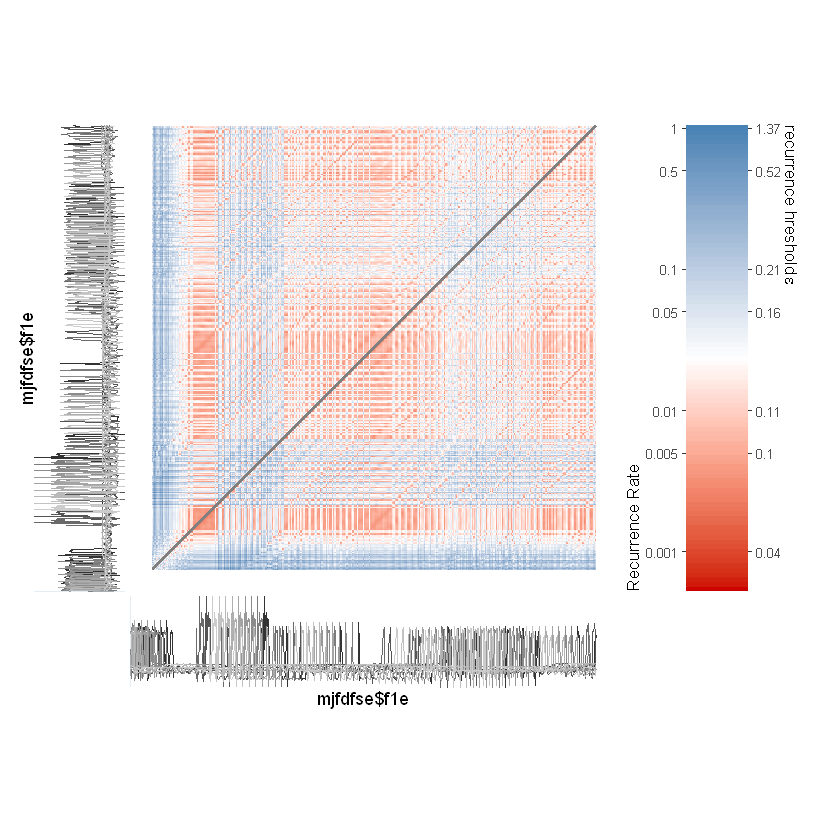

In [34]:
#RQA plot mono
# Unthresholded matrices (no radius applied)
rmmono <- rp(y1 = mjfdfse$f1e, emDim = emDim1, emLag = emLag1, emRad = NULL)
# plot it - mono
rp_plot(rmmono, plotDimensions = TRUE, plotMeasures = FALSE)

Warning message in rp_plot(rmmonoth, plotDimensions = TRUE, plotMeasures = FALSE):
"Package patchwork is not installed...
1. Install Xcode from App Store (MacOS) or rwintools.exe from CRAN (Windows) 
2. Install patchwork: devtools::install_github('thomasp85/patchwork')
3. Install casnet: devtools::install_github('FredHasselman/casnet')
....Using gtable instead, with limited options
"

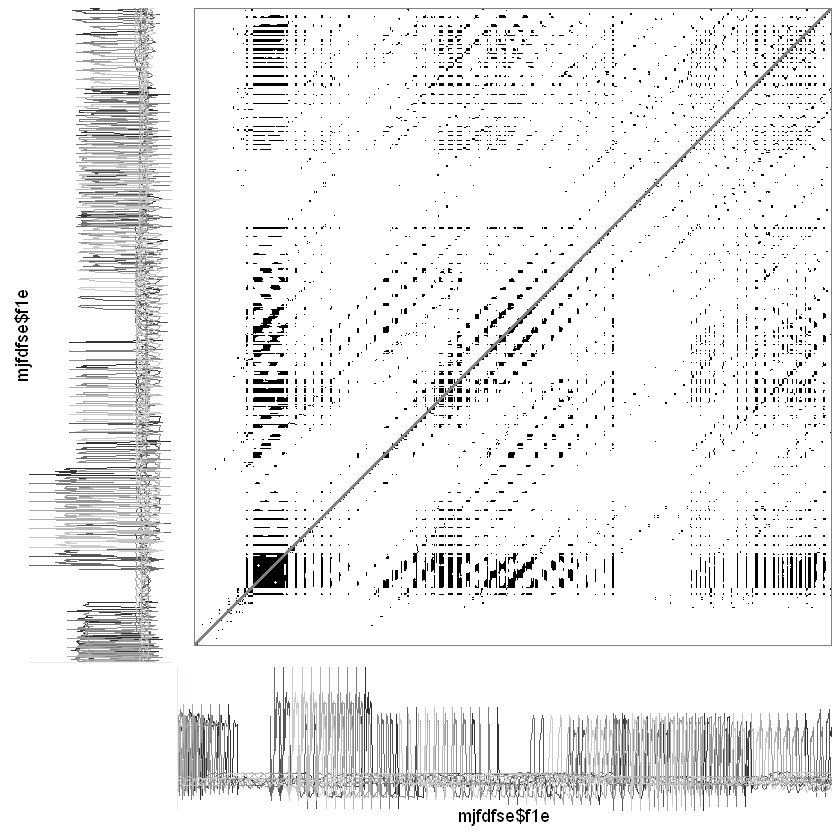

In [35]:
# Now threshold using the radius
rmmonoth <- rp(y1 = mjfdfse$f1e, emDim = emDim1, emLag = emLag1, emRad = emRad1)
rp_plot(rmmonoth, plotDimensions = TRUE, plotMeasures = FALSE)

In [36]:
#determinism and laminarity results
(out <- crqa_cl(mjfdfse$f1e, emDim = emDim1, emLag = emLag1, emRad = emRad1))


~~~o~~o~~casnet~~o~~o~~~

Performing auto-RQA

...using sequential processing...
  |o~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~o| 100%

Completed in:
   user  system elapsed 
   0.24    0.00    1.85 

~~~o~~o~~casnet~~o~~o~~~


.id,RR,DET,DET.RR,LAM,LAM.DET,L_max,L,L_entr,DIV,...,TT,V_entr,T1,T2,emDim,emLag,emRad,DLmin,VLmin,distNorm
window: 1 | start: 1 | stop: 1150,0.0502049,0.680205,13.5486,0.841118,1.23657,50,3.42066,1.5341,0.02,...,4.75044,1.96052,11.8753,36.636,11,14,0.1648265,2,2,EUCLIDEAN


Warning message in rp_plot(rmdyn, plotDimensions = TRUE, plotMeasures = FALSE):
"Package patchwork is not installed...
1. Install Xcode from App Store (MacOS) or rwintools.exe from CRAN (Windows) 
2. Install patchwork: devtools::install_github('thomasp85/patchwork')
3. Install casnet: devtools::install_github('FredHasselman/casnet')
....Using gtable instead, with limited options
"

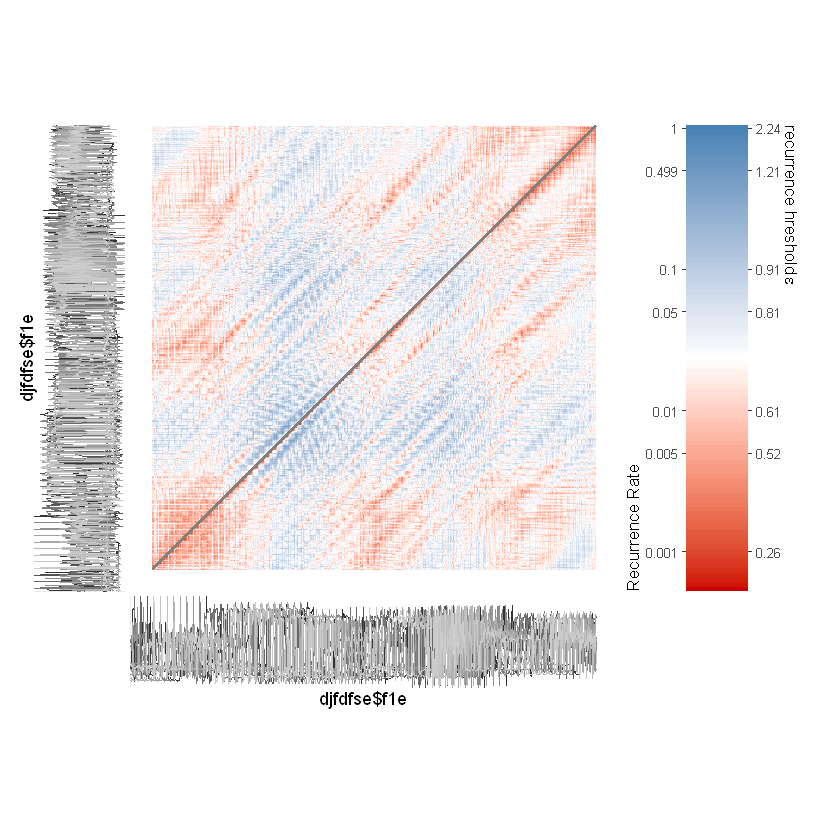

In [37]:
#RQA plot dynamic
# Unthresholded matrices (no radius applied)
rmdyn <- rp(y1 = djfdfse$f1e, emDim = emDim2, emLag = emLag2, emRad = NULL)
# plot it - mono
rp_plot(rmdyn, plotDimensions = TRUE, plotMeasures = FALSE)

Warning message in rp_plot(rmdynth, plotDimensions = TRUE, plotMeasures = FALSE):
"Package patchwork is not installed...
1. Install Xcode from App Store (MacOS) or rwintools.exe from CRAN (Windows) 
2. Install patchwork: devtools::install_github('thomasp85/patchwork')
3. Install casnet: devtools::install_github('FredHasselman/casnet')
....Using gtable instead, with limited options
"

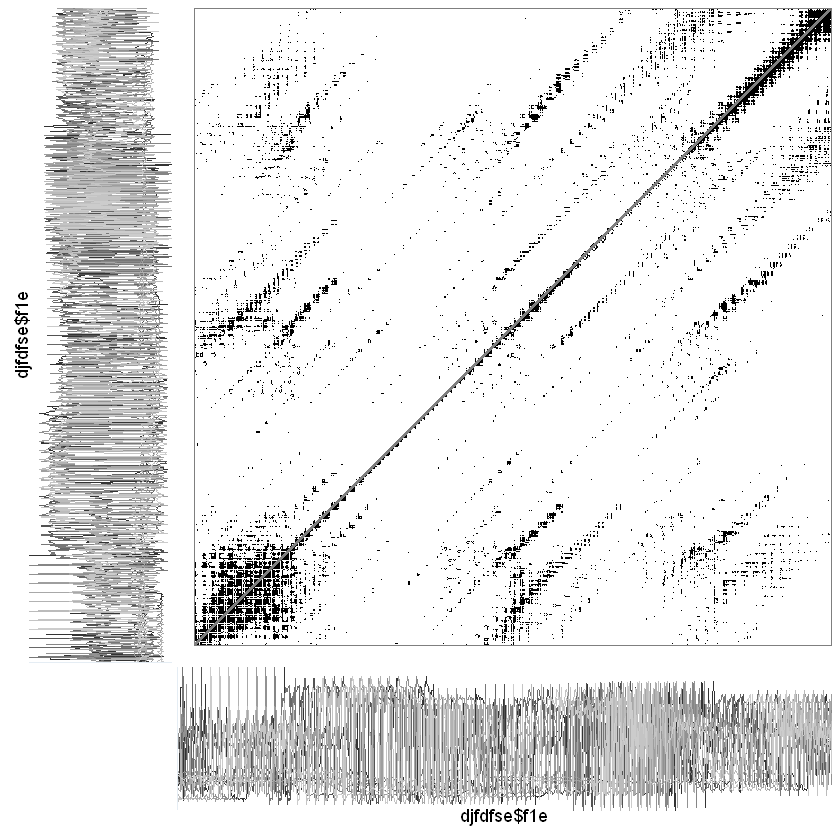

In [38]:
# Now threshold using the radius
rmdynth <- rp(y1 = djfdfse$f1e, emDim = emDim2, emLag = emLag2, emRad = emRad2)
rp_plot(rmdynth, plotDimensions = TRUE, plotMeasures = FALSE)

In [39]:
#determinism and laminarity results
(out <- crqa_cl(djfdfse$f1e, emDim = emDim2, emLag = emLag2, emRad = emRad2))


~~~o~~o~~casnet~~o~~o~~~

Performing auto-RQA

...using sequential processing...
  |o~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~oo~o| 100%

Completed in:
   user  system elapsed 
   0.25    0.00    1.79 

~~~o~~o~~casnet~~o~~o~~~


.id,RR,DET,DET.RR,LAM,LAM.DET,L_max,L,L_entr,DIV,...,TT,V_entr,T1,T2,emDim,emLag,emRad,DLmin,VLmin,distNorm
window: 1 | start: 1 | stop: 1150,0.0499327,0.672508,13.4683,0.811059,1.20602,211,3.32057,1.47502,0.00473934,...,4.16451,1.88469,14.6945,39.5796,12,14,0.812718,2,2,EUCLIDEAN
